In [1]:
%cd /Users/shahmuhammadraditrahman/Desktop/GoodPractiseDSID/

/Users/shahmuhammadraditrahman/Desktop/GoodPractiseDSID


In [2]:
from alzheimer.data.data_loader import Dataloader

In [3]:
import torch

# Check if MPS (Apple Silicon GPU support) is available
mps_available = torch.backends.mps.is_available()

# Print whether MPS is available or not
print("MPS available:", mps_available)
# If MPS is available, set the device to MPS for GPU computations
if mps_available:
    device = torch.device("mps")
    print("Using MPS device for computations")
else:
    device = torch.device("cpu")
    print("Using CPU for computations")

MPS available: True
Using MPS device for computations


In [4]:
device

device(type='mps')

In [3]:
!python alzheimer/data/data_loader.py --dataset /Users/shahmuhammadraditrahman/Desktop/dataset.zip

In [4]:
[(256, 128, 0.0), (128, 64, 0.4), (64, 16, 0.3), (16, 3)][-1]

(16, 3)

In [5]:
from alzheimer.models.model import Classifier

In [6]:
clf = Classifier()

# print(clf)

In [7]:
trainable_params = 0

for _, params in clf.named_parameters():
    trainable_params += params.numel()

print(f"Total trainable params: {trainable_params}")

Total trainable params: 1315217


In [6]:
device

device(type='mps')

In [6]:
device = torch.device("mps")

In [8]:
from alzheimer.models.train_model import Trainer

In [9]:
device

device(type='mps')

In [9]:
from matplotlib.pyplot import cla


trainer = Trainer(classifier=clf.to(device),device=device)

In [12]:
trainer.train(epochs=30)

Epochs: 1/30
m1_loss: 1.0350 - m1_acc: 0.4358 - val1_loss: 0.9994 - val1_acc: 0.4026
Epochs: 2/30
m1_loss: 0.9197 - m1_acc: 0.5960 - val1_loss: 0.9019 - val1_acc: 0.6398
Epochs: 3/30
m1_loss: 0.8660 - m1_acc: 0.6727 - val1_loss: 0.8752 - val1_acc: 0.6673
Epochs: 4/30
m1_loss: 0.8514 - m1_acc: 0.6909 - val1_loss: 0.8779 - val1_acc: 0.6648
Epochs: 5/30
m1_loss: 0.8380 - m1_acc: 0.7051 - val1_loss: 0.8584 - val1_acc: 0.6832
Epochs: 6/30
m1_loss: 0.8325 - m1_acc: 0.7093 - val1_loss: 0.8625 - val1_acc: 0.6770
Epochs: 7/30
m1_loss: 0.8166 - m1_acc: 0.7280 - val1_loss: 0.8301 - val1_acc: 0.7082
Epochs: 8/30
m1_loss: 0.8257 - m1_acc: 0.7204 - val1_loss: 0.8584 - val1_acc: 0.6837
Epochs: 9/30
m1_loss: 0.8095 - m1_acc: 0.7363 - val1_loss: 0.8279 - val1_acc: 0.7184
Epochs: 10/30
m1_loss: 0.7862 - m1_acc: 0.7631 - val1_loss: 0.8002 - val1_acc: 0.7510
Epochs: 11/30
m1_loss: 0.7788 - m1_acc: 0.7697 - val1_loss: 0.7978 - val1_acc: 0.7469
Epochs: 12/30
m1_loss: 0.8117 - m1_acc: 0.7375 - val1_loss: 0.8

In [13]:
model_evaluation, model_clf_report = trainer.model_performance()

/Users/shahmuhammadraditrahman/anaconda3/envs/alzheimer/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/shahmuhammadraditrahman/anaconda3/envs/alzheimer/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/shahmuhammadraditrahman/anaconda3/envs/alzheimer/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf

In [14]:
print(model_evaluation)

   Accuracy  Precision    Recall  F1_score
0  0.795918   0.795918  0.795918  0.795918


In [15]:
print(model_clf_report)

              precision    recall  f1-score   support

           0       0.93      0.87      0.90       889
           1       0.87      0.73      0.80      1071
           2       0.00      0.00      0.00         0

    accuracy                           0.80      1960
   macro avg       0.60      0.54      0.57      1960
weighted avg       0.90      0.80      0.84      1960



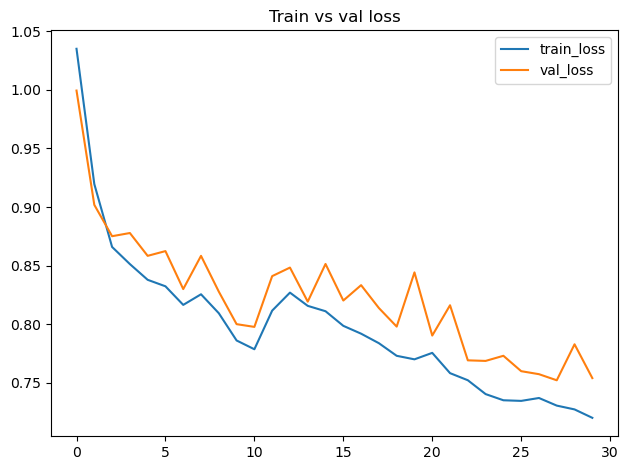

In [17]:
import matplotlib.pyplot as plt

plt.plot(trainer.history["m1_train_loss"], label="train_loss")
plt.plot(trainer.history["m1_val_loss"], label="val_loss")
plt.title("train vs val loss".capitalize())
plt.legend()
plt.tight_layout()
plt.show()

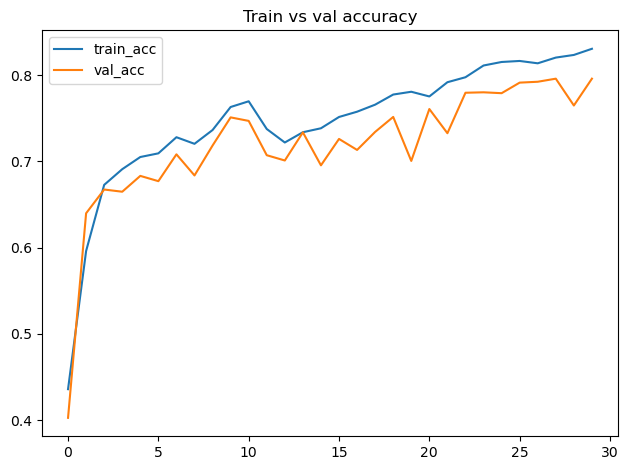

In [18]:
plt.plot(trainer.history["m1_train_acc"], label="train_acc")
plt.plot(trainer.history["m1_val_acc"], label="val_acc")
plt.title("train vs val accuracy".capitalize())
plt.legend()
plt.tight_layout()
plt.show()

In [14]:
check = torch.load("/Users/shahmuhammadraditrahman/Desktop/GoodPractiseDSID/data/processed/test_loader.pth")

td = 0
tl = 0
for data, label in check:
    td = td + data.shape[0]
    tl = tl + label.shape[0]
    
print(td, tl)

1960 1960


In [15]:
check = torch.load(
    "/Users/shahmuhammadraditrahman/Desktop/GoodPractiseDSID/data/processed/train_loader.pth"
)

td = 0
tl = 0
for data, label in check:
    td = td + data.shape[0]
    tl = tl + label.shape[0]

print(td, tl)

5879 5879
